### Student ID: 1103200032
### Name: Fajra Risqulla
### Class: TK-44-06
### Dataset: [Singapore Airbnb](https://www.kaggle.com/datasets/jojoker/singapore-airbnb)
### Model: Linear Regression

**Chat GPT Prompt:**<br><br>
read dataset from csv
1. pd.read_csv(): This function read csv from the filepath and transform to dataframe.
2. pd.head(): This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it (default n=5).
3. pd.info(): This function prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# read dataset and transform to dataframe
df = pd.read_csv("./listings.csv")

In [105]:
# print top the 5 datapoints
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

**Summary:**
the dataset contains 7907 samples of Airbnb in Singapore

1. **id:** 
   - **Description:** An identifier for each listing.
   - **Data Type:** Integer (int64)
   - **Non-null Count:** 7907

2. **name:** 
   - **Description:** The name or title of the listing.
   - **Data Type:** Object (string)
   - **Non-null Count:** 7905
   - **Note:** It has two missing/null values.

3. **host_id:** 
   - **Description:** An identifier for the host of the listing.
   - **Data Type:** Integer (int64)
   - **Non-null Count:** 7907

4. **host_name:** 
   - **Description:** The name of the host of the listing.
   - **Data Type:** Object (string)
   - **Non-null Count:** 7907

5. **neighbourhood_group:** 
   - **Description:** The group or category to which the neighbourhood belongs.
   - **Data Type:** Object (string)
   - **Non-null Count:** 7907

6. **neighbourhood:** 
   - **Description:** The name of the neighbourhood.
   - **Data Type:** Object (string)
   - **Non-null Count:** 7907

7. **latitude:** 
   - **Description:** Latitude coordinates of the listing.
   - **Data Type:** Float (float64)
   - **Non-null Count:** 7907

8. **longitude:** 
   - **Description:** Longitude coordinates of the listing.
   - **Data Type:** Float (float64)
   - **Non-null Count:** 7907

9. **room_type:** 
   - **Description:** Type of room that is listed (e.g., entire home/apartment, private room, shared room).
   - **Data Type:** Object (string)
   - **Non-null Count:** 7907

10. **price:** 
    - **Description:** The price for the listing (in USD).
    - **Data Type:** Integer (int64)
    - **Non-null Count:** 7907

11. **minimum_nights:** 
    - **Description:** The minimum number of nights required for booking.
    - **Data Type:** Integer (int64)
    - **Non-null Count:** 7907

12. **number_of_reviews:** 
    - **Description:** The total number of reviews received for the listing.
    - **Data Type:** Integer (int64)
    - **Non-null Count:** 7907

13. **last_review:** 
    - **Description:** Date of the last review received.
    - **Data Type:** Object (string)
    - **Non-null Count:** 5149
    - **Note:** It has missing/null values (2758 entries).

14. **reviews_per_month:** 
    - **Description:** Average number of reviews per month.
    - **Data Type:** Float (float64)
    - **Non-null Count:** 5149
    - **Note:** It has missing/null values (2758 entries).

15. **calculated_host_listings_count:** 
    - **Description:** Total count of listings by the host.
    - **Data Type:** Integer (int64)
    - **Non-null Count:** 7907

16. **availability_365:** 
    - **Description:** Number of days the listing is available within a year.
    - **Data Type:** Integer (int64)
    - **Non-null Count:** 7907

In [107]:
print(f"Number of NaN values in 'reviews_per_month' column before filling: {df['reviews_per_month'].isnull().sum()}")

Number of NaN values in 'reviews_per_month' column before filling: 2758


In [108]:
# Calculate the mean of the 'reviews_per_month' column excluding NaN values
mean_reviews_per_month = df['reviews_per_month'].mean()

# Fill NaN values in the 'bmi' column with the mean
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Check the count of NaN values in the 'reviews_per_month' column after filling
print(f"Number of NaN values in 'reviews_per_month' column after filling: {df['reviews_per_month'].isnull().sum()}")

Number of NaN values in 'reviews_per_month' column after filling: 0


In [109]:
# print all the unique values of each columns
print(f"room_type: {df['room_type'].unique()}")
print(f"neighbourhood_type: {df['neighbourhood_group'].unique()}")

room_type: ['Private room' 'Entire home/apt' 'Shared room']
neighbourhood_type: ['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [111]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [112]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.037604,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.330000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,1.043669,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.043669,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [113]:
categorical_features = [
    "neighbourhood_group",
    "room_type",
]
numerical_features = [
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
]
target = ['price']

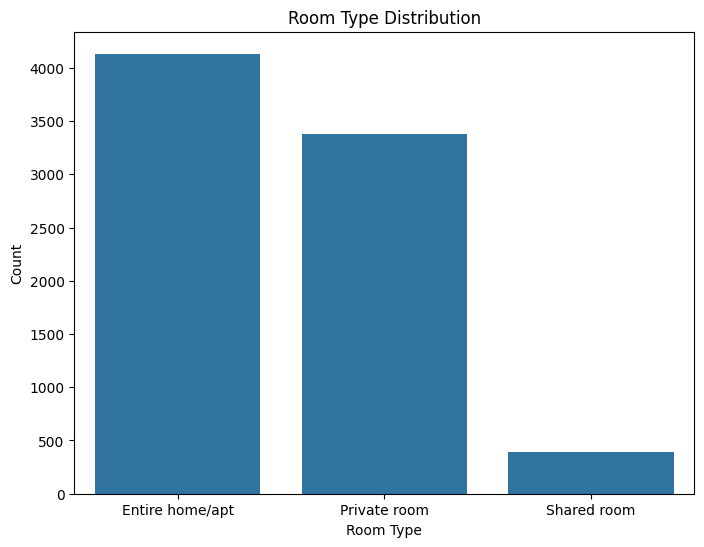

In [114]:
room_type_counts = df[categorical_features[1]].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

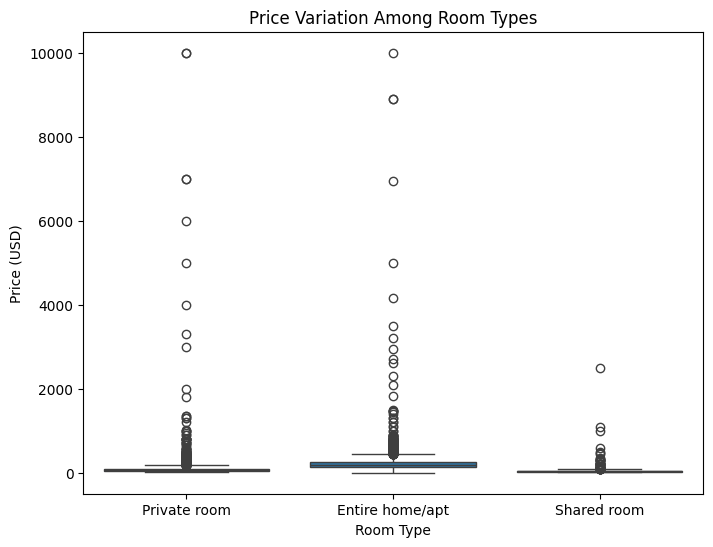

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_features[1], y=target[0], data=df)
plt.title('Price Variation Among Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()

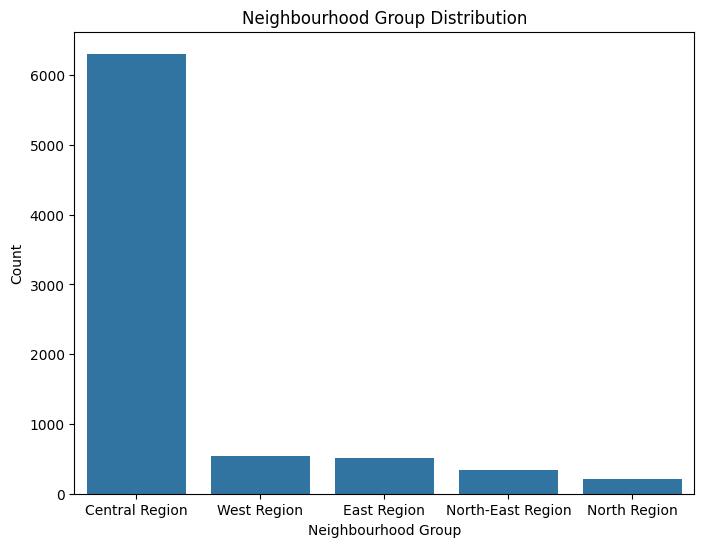

In [116]:
room_type_counts = df[categorical_features[0]].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

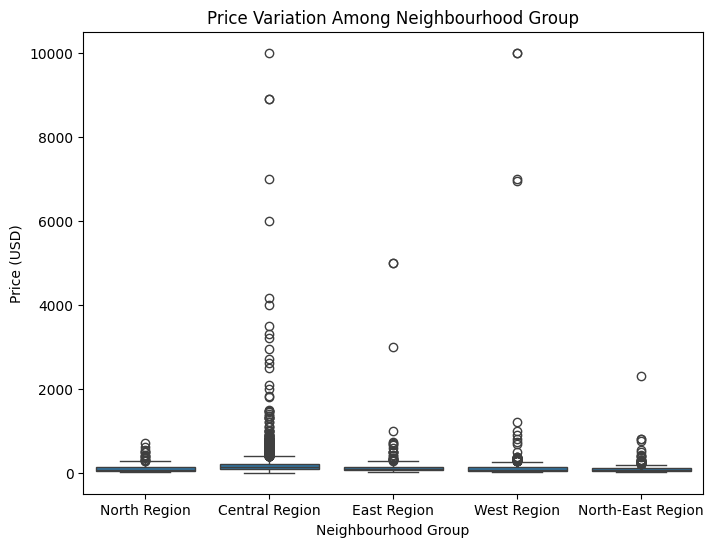

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_features[0], y=target[0], data=df)
plt.title('Price Variation Among Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.show()

In [118]:
print("Original DataFrame shape:", df.shape)

Original DataFrame shape: (7907, 16)


**Chat GPT Prompt:**<br><br>
Drop outliers.
- To drop we need to get Q1, Q2 and IQR then compute all of them to find upper limit and lower limit

In [119]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to filter outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe to exclude rows with 'price' considered as outliers based on IQR
df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

# Checking the shape of the dataframe after removing outliers
print("DataFrame shape after removing outliers:", df.shape)

DataFrame shape after removing outliers: (7583, 16)


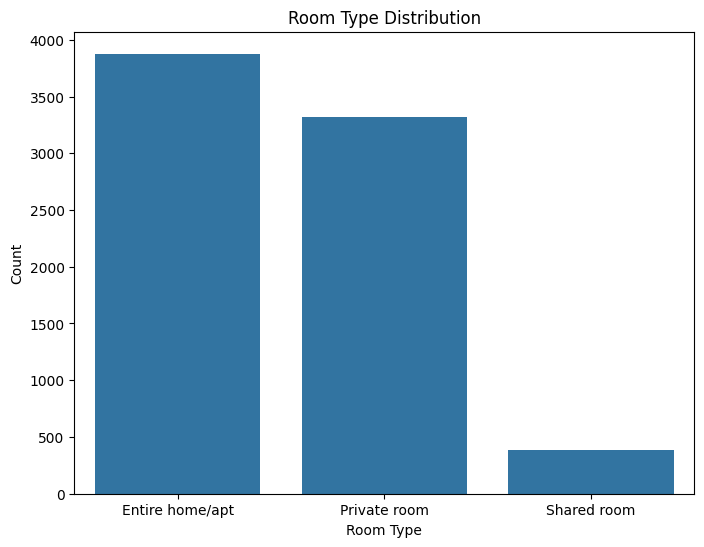

In [120]:
room_type_counts = df[categorical_features[1]].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

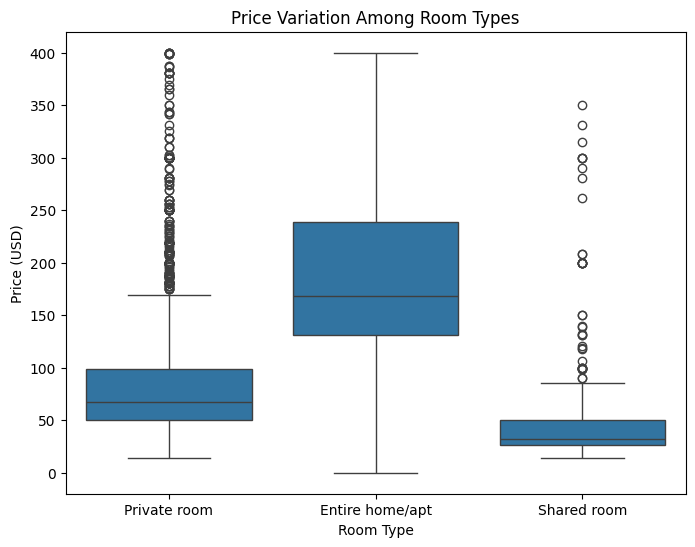

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_features[1], y=target[0], data=df)
plt.title('Price Variation Among Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()

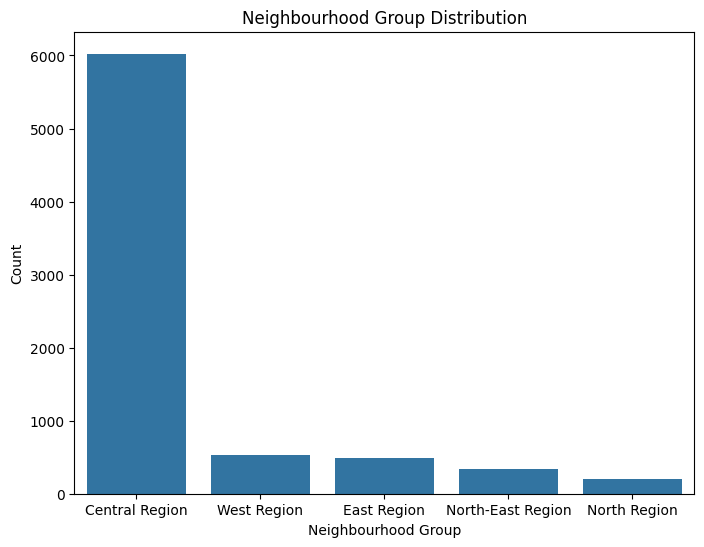

In [122]:
room_type_counts = df[categorical_features[0]].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

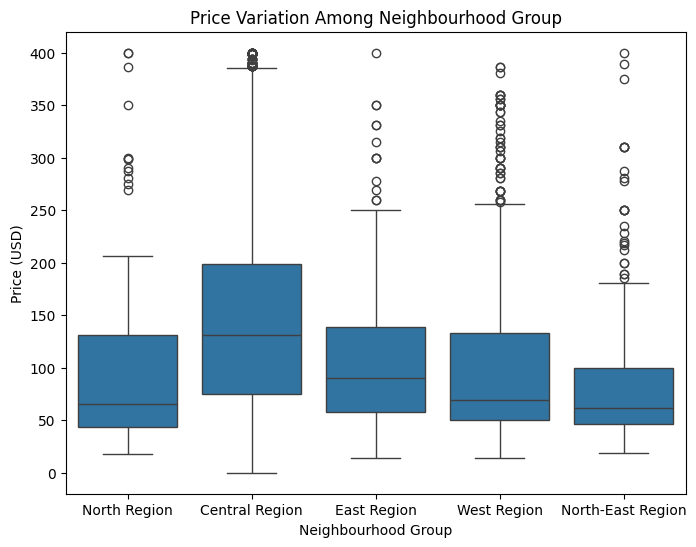

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_features[0], y=target[0], data=df)
plt.title('Price Variation Among Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.show()

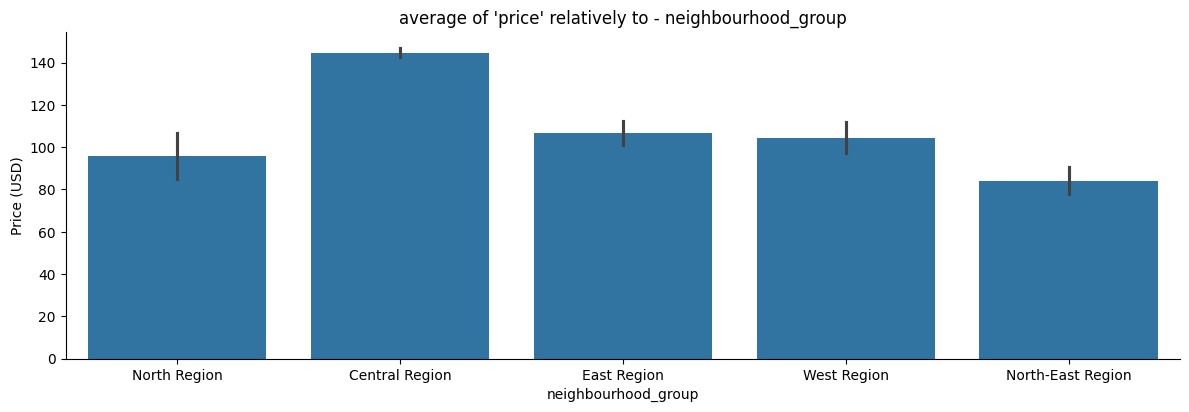

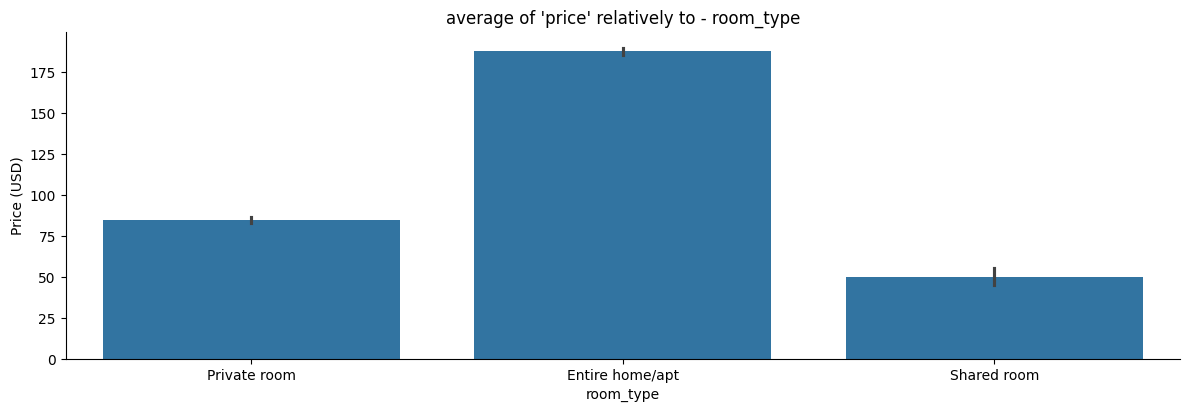

In [124]:
for col in categorical_features:
  sns.catplot(
      x=col,
      y="price",
      kind="bar",
      dodge=False,
      height=4,
      aspect=3,
      data=df,
  )
  plt.ylabel("Price (USD)")
  plt.title(f"average of 'price' relatively to - {col}")
  plt.show()

In [125]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.583000e+03,7.583000e+03,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000
mean,2.328380e+07,9.042318e+07,1.314548,103.848884,135.398919,17.741131,13.017803,1.040226,41.148754,206.829223
std,1.016592e+07,8.202503e+07,0.030647,0.044008,86.096535,41.919049,29.770570,1.031923,66.023371,146.144491
min,4.909100e+04,2.366600e+04,1.245260,103.665470,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.572431e+07,2.214009e+07,1.295935,103.835985,64.000000,1.000000,0.000000,0.330000,2.000000,52.000000
50%,2.454651e+07,6.173324e+07,1.311220,103.849670,119.000000,3.000000,2.000000,1.043669,9.000000,257.000000
75%,3.231678e+07,1.538530e+08,1.322410,103.874325,185.000000,10.000000,11.000000,1.043669,48.000000,354.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,400.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


**Chat GPT Prompt:**<br><br>
Convert the column datatypes of *room_type* and *neighbourhood_group* to int by using LabelEncoder().
- Label Encoding: converts categorical values to numeric integers but assigns unique integers to each unique value

In [126]:
# before converted to int
print(f"neighbourhood groups: {df['neighbourhood_group'].unique()}")
print(f"room types: {df['room_type'].unique()}")
df.info()

neighbourhood groups: ['North Region' 'Central Region' 'East Region' 'West Region'
 'North-East Region']
room types: ['Private room' 'Entire home/apt' 'Shared room']
<class 'pandas.core.frame.DataFrame'>
Index: 7583 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7583 non-null   int64  
 1   name                            7582 non-null   object 
 2   host_id                         7583 non-null   int64  
 3   host_name                       7583 non-null   object 
 4   neighbourhood_group             7583 non-null   object 
 5   neighbourhood                   7583 non-null   object 
 6   latitude                        7583 non-null   float64
 7   longitude                       7583 non-null   float64
 8   room_type                       7583 non-null   object 
 9   price                           7583 non-null   int64  


In [127]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [128]:
label_encoder = LabelEncoder()

df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

In [129]:
# after conveted to int
print(f"neighbourhood groups: {df['neighbourhood_group'].unique()}")
print(f"neighbourhoods: {df['neighbourhood'].unique()}")
print(f"room types: {df['neighbourhood_group'].unique()}")
df.info()

neighbourhood groups: [2 0 1 4 3]
neighbourhoods: [39  6 35  1  4 20 11 27 14 28 26 31 18 24 37 23 25 36 12 15 21 10  5 32
 22  0  3 19  8 30  9 13 29  2  7 40 17 34 38 33 16]
room types: [2 0 1 4 3]
<class 'pandas.core.frame.DataFrame'>
Index: 7583 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7583 non-null   int64  
 1   name                            7582 non-null   object 
 2   host_id                         7583 non-null   int64  
 3   host_name                       7583 non-null   object 
 4   neighbourhood_group             7583 non-null   int64  
 5   neighbourhood                   7583 non-null   int64  
 6   latitude                        7583 non-null   float64
 7   longitude                       7583 non-null   float64
 8   room_type                       7583 non-null   int64  
 9   price                 

In [130]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,2,39,1.44255,103.79580,1,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,0,6,1.33235,103.78521,1,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,2,39,1.44246,103.79667,1,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,1,35,1.34541,103.95712,1,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,1,35,1.34567,103.95963,1,94,1,22,2019-07-28,0.22,9,355


**Chat GPT Prompt:**<br><br>
training and evaluating datasets with the following features and a target:
* selected_features = ["minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365", "neighbourhood_group",  "room_type"]
* target = ["price"]

In [131]:
x = df[[*numerical_features, *categorical_features]]
y = df[target]

In [132]:
# Splitting dataset for model training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [133]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
X_train = X_norm

Peak to Peak range by column in Raw        X:number_of_reviews                 323.00
reviews_per_month                  12.98
calculated_host_listings_count    273.00
availability_365                  365.00
neighbourhood_group                 4.00
room_type                           2.00
dtype: float64
Peak to Peak range by column in Normalized X:[11.04783689 12.67243751  4.13042941  2.49838458  3.42273487  3.36258597]


In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

/Users/cisnux/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Chat GPT Prompt:**<br><br>
inputting new data without console then print estimated price

In [140]:
# Create a new sample (example)
new_data = {
    "minimum_nights": 180,
    "number_of_reviews": 1,
    "calculated_host_listings_count": 2,
    "availability_365": 365,
    "neighbourhood_group": 2, # East Region
    "reviews_per_month": 0.01,
    "room_type": 1,
}

# Convert the new sample to DataFrame
new_df = pd.DataFrame([new_data])

# Label encode categorical columns in the new data
label_encoder = LabelEncoder()

# Assuming 'neighbourhood_group' and 'room_type' are the categorical columns
new_df['neighbourhood_group'] = label_encoder.fit_transform(new_df['neighbourhood_group'])
new_df['room_type'] = label_encoder.fit_transform(new_df['room_type'])

# Predict the price using the trained model
new_processed = new_df[[*numerical_features, *categorical_features]]  # Select the relevant features
estimated_price = model.predict(new_processed)

print(f"The estimated price for the new data: {round(estimated_price[0][0])}$")

The estimated price for the new data: 4322$


/Users/cisnux/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [141]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Absolute Error: 2228.7063465283836
Mean Squared Error: 7473667.773640084
R-squared: -1033.2710550988784


Text(0.5, 1.0, 'The correlations between features and target (price)')

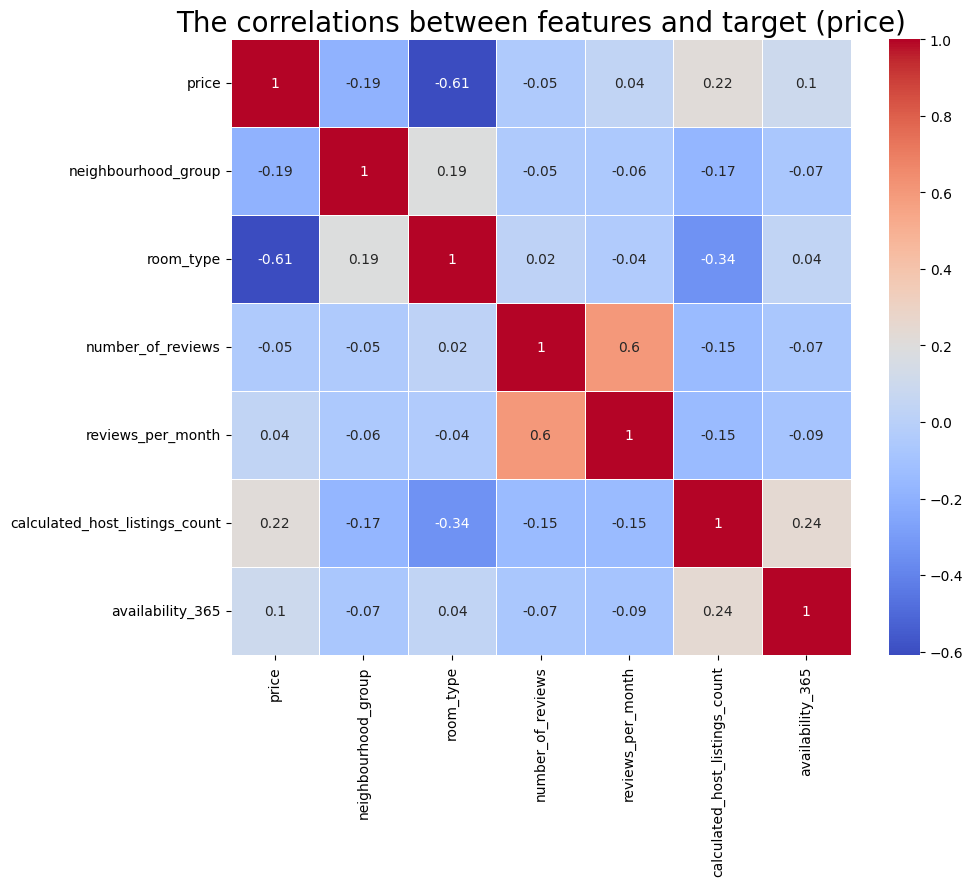

In [137]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[[*target,*categorical_features,*numerical_features]].corr().round(2)
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("The correlations between features and target (price)", size=20)